In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
bank=pd.read_csv("bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='y', ylabel='count'>

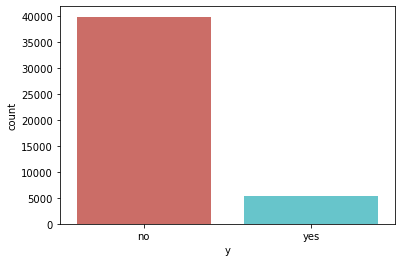

In [19]:
sn.countplot(x='y',data=bank,palette="hls")

In [21]:
pd.crosstab(bank.job,bank.y)  

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [22]:
pd.crosstab(bank.marital,bank.y)  

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [23]:
pd.crosstab(bank.education,bank.y)  

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [24]:
pd.crosstab(bank.default,bank.y)  

y,no,yes
default,,
no,39159,5237
yes,763,52


In [25]:
pd.crosstab(bank.balance,bank.y)  

y,no,yes
balance,,
-8019,1,0
-6847,1,0
-4057,1,0
-3372,1,0
-3313,1,0
...,...,...
66721,1,0
71188,1,0
81204,0,2


In [26]:
pd.crosstab(bank.housing,bank.y)  

y,no,yes
housing,,
no,16727,3354
yes,23195,1935


In [27]:
pd.crosstab(bank.loan,bank.y)  

y,no,yes
loan,,
no,33162,4805
yes,6760,484


In [28]:
pd.crosstab(bank.contact,bank.y)  

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


In [29]:
pd.crosstab(bank.day,bank.y)  

y,no,yes
day,,
1,232,90
2,1111,182
3,901,178
4,1215,230
5,1695,215
6,1751,181
7,1660,157
8,1641,201
9,1382,179


In [30]:
pd.crosstab(bank.month,bank.y)  

y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


In [32]:
pd.crosstab(bank.duration,bank.y)  

y,no,yes
duration,,
0,3,0
1,2,0
2,3,0
3,4,0
4,15,0
...,...,...
3366,1,0
3422,1,0
3785,1,0


In [33]:
pd.crosstab(bank.campaign,bank.y)  

y,no,yes
campaign,,
1,14983,2561
2,11104,1401
3,4903,618
4,3205,317
5,1625,139
6,1199,92
7,688,47
8,508,32
9,306,21


In [34]:
pd.crosstab(bank.pdays,bank.y)  

y,no,yes
pdays,,
-1,33570,3384
1,9,6
2,35,2
3,1,0
4,1,1
...,...,...
838,1,0
842,0,1
850,1,0


In [35]:
pd.crosstab(bank.previous,bank.y)  

y,no,yes
previous,,
0,33570,3384
1,2189,583
2,1650,456
3,848,294
4,543,171
5,338,121
6,194,83
7,151,54
8,90,39


In [36]:
pd.crosstab(bank.poutcome,bank.y)  

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


<AxesSubplot:xlabel='job', ylabel='count'>

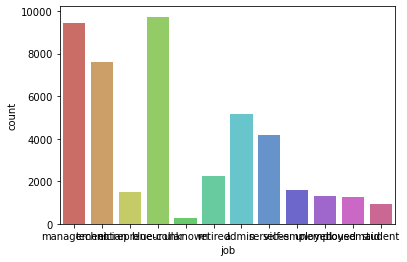

In [37]:
sn.countplot(x="job",data=bank,palette="hls")
 

<AxesSubplot:xlabel='marital', ylabel='count'>

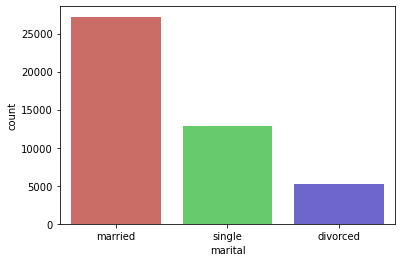

In [38]:
sn.countplot(x="marital",data=bank,palette="hls")
 

<AxesSubplot:xlabel='education', ylabel='count'>

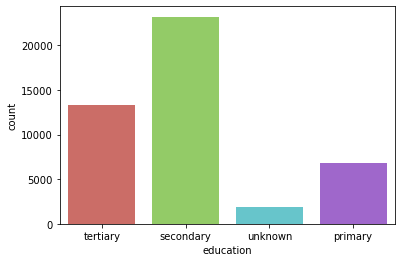

In [39]:
sn.countplot(x="education",data=bank,palette="hls")
 

<AxesSubplot:xlabel='default', ylabel='count'>

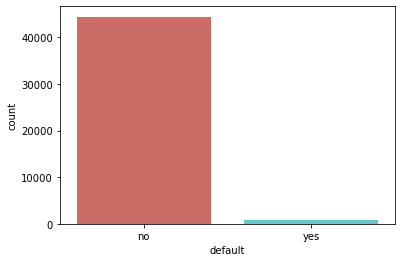

In [40]:
sn.countplot(x="default",data=bank,palette="hls")
 

<AxesSubplot:xlabel='balance', ylabel='count'>

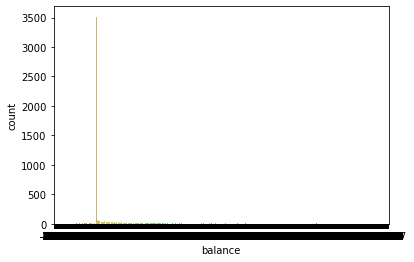

In [41]:
sn.countplot(x="balance",data=bank,palette="hls")
 

<AxesSubplot:xlabel='housing', ylabel='count'>

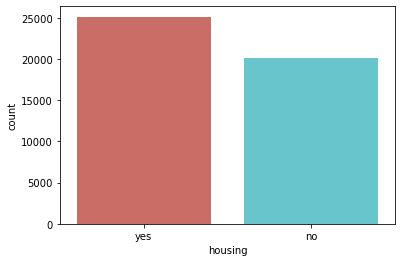

In [42]:
sn.countplot(x="housing",data=bank,palette="hls")
 

<AxesSubplot:xlabel='loan', ylabel='count'>

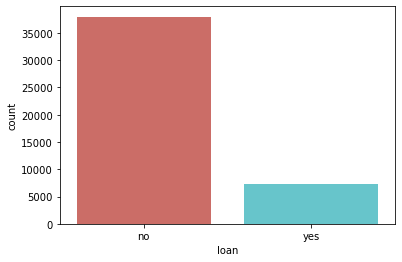

In [43]:
sn.countplot(x="loan",data=bank,palette="hls")
 

<AxesSubplot:xlabel='contact', ylabel='count'>

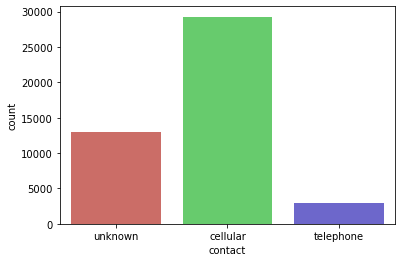

In [44]:
sn.countplot(x="contact",data=bank,palette="hls")
 

<AxesSubplot:xlabel='day', ylabel='count'>

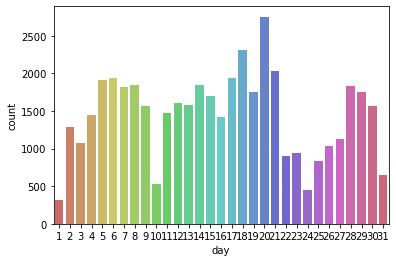

In [45]:
sn.countplot(x="day",data=bank,palette="hls")
 

<AxesSubplot:xlabel='month', ylabel='count'>

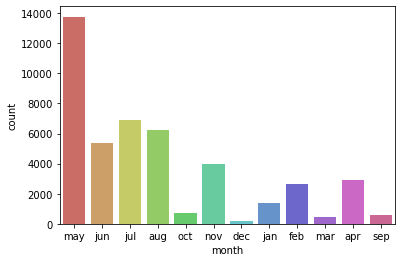

In [46]:
sn.countplot(x="month",data=bank,palette="hls")
 

<AxesSubplot:xlabel='duration', ylabel='count'>

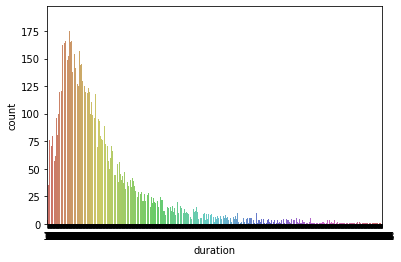

In [47]:
sn.countplot(x="duration",data=bank,palette="hls")
 

<AxesSubplot:xlabel='campaign', ylabel='count'>

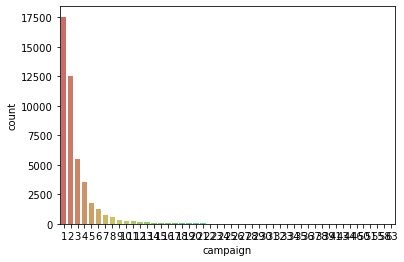

In [49]:
sn.countplot(x="campaign",data=bank,palette="hls")
 

<AxesSubplot:xlabel='pdays', ylabel='count'>

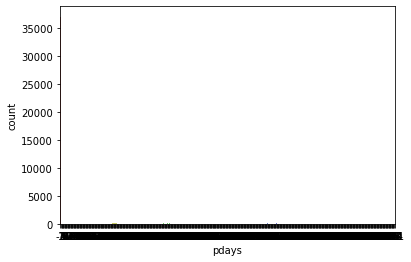

In [48]:
sn.countplot(x="pdays",data=bank,palette="hls")
 

<AxesSubplot:xlabel='previous', ylabel='count'>

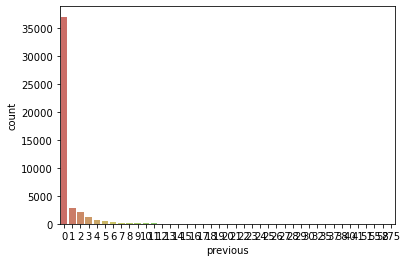

In [50]:
sn.countplot(x="previous",data=bank,palette="hls")
 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

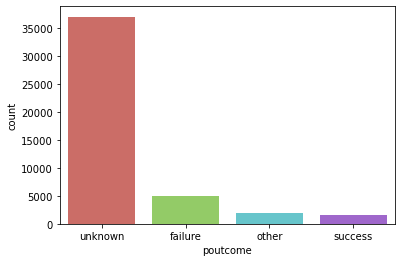

In [52]:
sn.countplot(x="poutcome",data=bank,palette="hls")
 

In [248]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
bank['poutcome']=label_encoder.fit_transform(bank["poutcome"])
bank["housing"]=label_encoder.fit_transform(bank["housing"])
bank["loan"]=label_encoder.fit_transform(bank["loan"])
bank["y"]=label_encoder.fit_transform(bank["y"])
bank["contact"]=label_encoder.fit_transform(bank["contact"])
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [5]:
from sklearn.linear_model import LogisticRegression

In [264]:
x=bank.iloc[:,[0,2,5,6,7,8,9,11,12,14,15]]
y=bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(x,y) 



C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [265]:
classifier.coef_    

array([[-1.03519751e-02, -2.65059748e-01,  5.92252905e-05,
        -6.17870676e-01, -1.80973162e-01, -6.24625058e-01,
        -1.83176001e-02,  4.09779071e-03, -3.17250440e-01,
        -3.76898175e-03, -4.17045196e-01]])

In [266]:
classifier.predict_proba (x)

array([[0.96844713, 0.03155287],
       [0.98401705, 0.01598295],
       [0.98567183, 0.01432817],
       ...,
       [0.27381971, 0.72618029],
       [0.91818568, 0.08181432],
       [0.65138431, 0.34861569]])

In [267]:
y_pred = classifier.predict(x)
bank["y_pred"] = y_pred
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [268]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
bank_new = pd.concat([bank,y_prob],axis=1)
bank_new 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.968447,0.031553
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.984017,0.015983
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.985672,0.014328
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.982714,0.017286
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.960738,0.039262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,1,0.373507,0.626493
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0,0.766551,0.233449
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,1,0.273820,0.726180
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0,0.918186,0.081814


In [269]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix) 


[[39057   865]
 [ 4214  1075]]


In [270]:
accuracy = sum(y==y_pred)/bank.shape[0]
accuracy 

0.887660082723231

In [271]:
from sklearn.metrics import classification_report 
print (classification_report (y, y_pred))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.20      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



In [272]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score  

0.5907923906903013

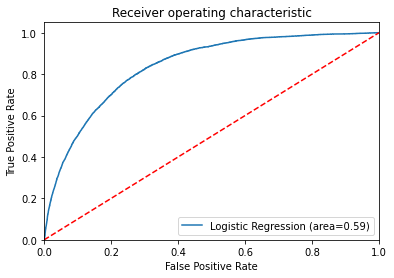

In [273]:
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [274]:
import statsmodels.api as sm

In [275]:
logit=sm.Logit(y,x)

In [276]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.276575
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45200
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.2336
Time:                        16:43:15   Log-Likelihood:                -12504.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0230      0.001    -21.526      0.000      -0.025      -0.021
marital       -0.1820      0.023     -7.792      0.000      -0.228      -0.136
balance     2.077e-05   4.49e-06      4.628      0.000     1.2e-05    2.96e-05
housing       -1.2488      0.034    -36.248      0.000      -1.316      -1.181
loan          -0.8330      0.056    -14.841      0.000      -0.943      -0.723
contact       -0.5897      0.026    -22.938      0.000      -0.640      -0.539
day           -0.0168      0.002     -8.566      0.000      -0.021      -0.013
duration       0.0038      6e-05     63.175      0.000       0.004       0.004
campaign      -0.1691      0.010    -16.141      0.000      -0.190      -0.149
previous       0.0564      0.008      7.246      0.000       0.041       0.072
poutcome      -0.2418      0.016    -14.896      0.000      -0.274      -0.210
==============================================================================
"""

In [277]:
fpr

array([0.00000000e+00, 2.50488452e-05, 2.50488452e-05, ...,
       9.97545213e-01, 9.97545213e-01, 1.00000000e+00])

In [278]:
tpr

array([0.00000000e+00, 0.00000000e+00, 1.89071658e-04, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])